In [3]:
import sys
import os
os.chdir('../')
import matplotlib.pyplot as plt
import torch
from   bin.model import BrainMimic
import networkx as nx
import nibabel as nib
import pandas as pd
import json


ModuleNotFoundError: No module named 'nilearn'

In [ ]:
structure_graph_path = '/Users/loggiasr/Projects/fmri/monkey_fmri/MTurk1_frozen_20220527/misc_testing_files/fully_connected_simple.gml'  # path to shape color graph
data = json.load(open(structure_graph_path, 'r'))
gt = nx.readwrite.node_link_graph(data)

In [ ]:
# prune gt
for s, t, data in list(gt.edges(data=True)):
    if abs(data['weight']) < .5:
        gt.remove_edge(s, t)

In [ ]:
roi_atlas = nib.load('/Users/loggiasr/Projects/fmri/monkey_fmri/MTurk1_frozen_20220527/D99_v2.0_dist/simplified_atlas.nii')

In [2]:
start_node = None
for n, data in gt.nodes(data=True):
    if data['roi_name'] == 'V1':
        start_node = n
        break
echo = BrainMimic(gt, start_node, units_per_voxel=1, stimuli_shape=(1, 3, 64, 64), start_lr=.01)
echo.load_network_state('/Users/loggiasr/Projects/fmri/monkey_fmri/MTurk1/misc_testing_files/noise_low_l1_5prune_super_epoch_4')

NameError: name 'gt' is not defined

In [7]:
# load paradigm data
from dataloaders import dyloc_data_loader, shape_color_dataloader
stimuli = [shape_color_dataloader.ShapeColorBasicData("/Users/loggiasr/Projects/fmri/monkey_fmri/MTurk1/stimuli/small_stimuli", exp_image_size=(64, 64)),
           dyloc_data_loader.DylocDataloader("/Users/loggiasr/Projects/fmri/monkey_fmri/MTurk1/stimuli/dyloc_downsampled", exp_image_size=(64, 64), stim_frames=10)]



********************
META: SUPER Epoch # 0
********************

********************
META: LOCAL Epoch #  0 (auper epoch 0 )
********************

********************
PRESENTING paradigm shape_color_basic
********************

PRESENTING cond colored_circle frame 0

PRESENTING cond colored_circle frame 1

PRESENTING cond colored_circle frame 2

PRESENTING cond colored_circle frame 3

PRESENTING cond colored_circle frame 4

PRESENTING cond colored_circle frame 5

PRESENTING cond colored_circle frame 6

PRESENTING cond colored_circle frame 7

PRESENTING cond colored_circle frame 8

PRESENTING cond colored_circle frame 9

PRESENTING cond colored_circle frame 10

PRESENTING cond colored_circle frame 11

PRESENTING cond colored_circle frame 12

PRESENTING cond colored_circle frame 13

PRESENTING cond colored_circle frame 14

PRESENTING cond colored_circle frame 15

PRESENTING cond colored_circle frame 16

PRESENTING cond colored_circle frame 17

PRESENTING cond colored_circle frame 18

P

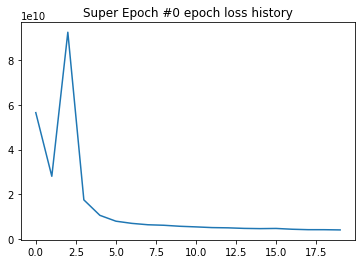

Pruning, factor= 0.02
current number edges: 107
average weight : 0.0894240289926529 weight std 0.005598569288849831
Pruned edge  V4 -> MT with weight 0.08506800979375839
Pruned edge  V2 -> V1 with weight 0.08374281227588654
Pruned edge  frontal-eye-field  -> V3a with weight 0.0814710408449173

********************
META: SUPER Epoch # 1
********************

********************
META: LOCAL Epoch #  0 (auper epoch 1 )
********************

********************
PRESENTING paradigm shape_color_basic
********************

PRESENTING cond chromatic_shape_uncolored frame 0

PRESENTING cond chromatic_shape_uncolored frame 1

PRESENTING cond chromatic_shape_uncolored frame 2

PRESENTING cond chromatic_shape_uncolored frame 3

PRESENTING cond chromatic_shape_uncolored frame 4

PRESENTING cond chromatic_shape_uncolored frame 5

PRESENTING cond chromatic_shape_uncolored frame 6

PRESENTING cond chromatic_shape_uncolored frame 7

PRESENTING cond chromatic_shape_uncolored frame 8

PRESENTING cond c

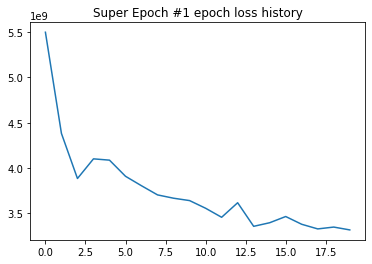

Pruning, factor= 0.01866065983073615
current number edges: 104
average weight : 0.09232068061828613 weight std 0.005365286488085985
Pruned edge  V2 -> MT with weight 0.08782214671373367
Pruned edge  V1 -> V3a with weight 0.08838695287704468

********************
META: SUPER Epoch # 2
********************

********************
META: LOCAL Epoch #  0 (auper epoch 2 )
********************

********************
PRESENTING paradigm shape_color_basic
********************

PRESENTING cond chromatic_shape_uncolored frame 0

PRESENTING cond chromatic_shape_uncolored frame 1

PRESENTING cond chromatic_shape_uncolored frame 2

PRESENTING cond chromatic_shape_uncolored frame 3

PRESENTING cond chromatic_shape_uncolored frame 4

PRESENTING cond chromatic_shape_uncolored frame 5

PRESENTING cond chromatic_shape_uncolored frame 6

PRESENTING cond chromatic_shape_uncolored frame 7

PRESENTING cond chromatic_shape_uncolored frame 8

PRESENTING cond chromatic_shape_uncolored frame 9

PRESENTING cond chr

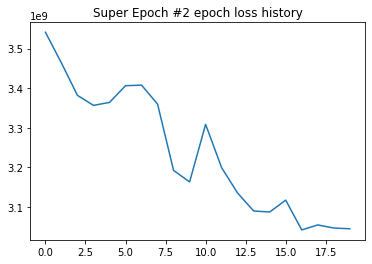

Pruning, factor= 0.017411011265922482
current number edges: 102
average weight : 0.09288670122623444 weight std 0.0055601284839212894
Pruned edge  V3a -> V4 with weight 0.08938857913017273
Pruned edge  V1 -> V2 with weight 0.08949130028486252

********************
META: SUPER Epoch # 3
********************

********************
META: LOCAL Epoch #  0 (auper epoch 3 )
********************

********************
PRESENTING paradigm shape_color_basic
********************

PRESENTING cond chromatic_shape_colored frame 0

PRESENTING cond chromatic_shape_colored frame 1

PRESENTING cond chromatic_shape_colored frame 2

PRESENTING cond chromatic_shape_colored frame 3

PRESENTING cond chromatic_shape_colored frame 4

PRESENTING cond chromatic_shape_colored frame 5

PRESENTING cond chromatic_shape_colored frame 6

PRESENTING cond chromatic_shape_colored frame 7

PRESENTING cond chromatic_shape_colored frame 8

PRESENTING cond chromatic_shape_colored frame 9

PRESENTING cond chromatic_shape_color

KeyboardInterrupt: 

In [7]:
# stimuli provided are looped in batch to match stimulus frame number
echo.fit_rdms(stimuli, super_epochs=10, epochs=20, stimulus_frames=20, verbose=True, snapshot_out='/Users/loggiasr/Projects/fmri/monkey_fmri/MTurk1/misc_testing_files',
              start_lr=.0001, final_lr=.00000001, prune_start=.02, prune_stop=.01)

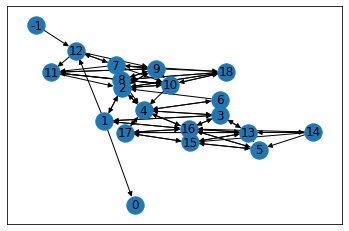

In [8]:
nx.draw_networkx(echo.brain, with_labels=True)

In [9]:
import numpy as np
weights = []

comp = sorted(nx.connected_components(echo.brain.to_undirected()), key=len, reverse=True)
ai_graph = echo.brain.subgraph(comp[0]).copy()

edges = list(ai_graph.edges(data=True))

for node, data in list(ai_graph.nodes(data=True)):
    name = data['roi_name']
    ai_graph.remove_node(node)
    ai_graph.add_node(int(node), roi_name=str(name))

for u, v, data in edges:
    if 'sequence' in data:
        full_weight_data = data['sequence'][0].weight.detach().flatten()
        weight = float(torch.mean(full_weight_data).item())
        weights.append(float(torch.mean(abs(full_weight_data)).detach().item()))
        ai_graph.add_edge(u, v, weight=weight, mag_weight=weights[-1])
threshold = np.abs(np.mean(np.array(weights))) - np.std(np.array(weights))

In [10]:
for s, t, data in list(ai_graph.edges(data=True)):
    if np.abs(data['mag_weight']) < threshold:
        ai_graph.remove_edge(s, t)

In [11]:
# rep graph
import graspologic as gr
pos_graph = ai_graph.copy()
for s, t, data in pos_graph.edges(data=True):
    pos_graph.edges[(s, t)]['weight'] = float(np.abs(data['weight']))
undirected_connectome, layout = gr.layouts.layout_tsne(pos_graph,
                                                       perplexity=10,
                                                       n_iter=1000)

/Users/loggiasr/miniconda3/envs/fmri/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/loggiasr/miniconda3/envs/fmri/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:
from graspologic.layouts.classes import NodePosition
for i in range(len(layout)):
    new_data = gr.layouts.classes.NodePosition(node_id=int(layout[i].node_id),
                                               x=layout[i].x,
                                               y=layout[i].y,
                                               size=layout[i].size,
                                               community=layout[i].community)
    layout[i] = new_data
cmap = plt.get_cmap('viridis')

raw_edge_weights = np.array([edge[2]['weight'] for edge in undirected_connectome.edges(data=True)])
edge_weights = raw_edge_weights - min(raw_edge_weights)
edge_weights = edge_weights / max(edge_weights)

edge_colors = np.array([cmap(val) for val in edge_weights])

edge_widths = np.abs(raw_edge_weights) - np.min(raw_edge_weights)
edge_widths = edge_widths / max(edge_widths)
edge_widths = (1. * edge_widths) + .25

node_colors = ['#808080'] * len(undirected_connectome.nodes())
labels = {}
for n in undirected_connectome.nodes:
    if 'roi_name' in undirected_connectome.nodes[n]:
        labels[n] = undirected_connectome.nodes[n]['roi_name']
    else:
        labels[n] = 'unnamed'

In [13]:
# add edge colors
def rgb_to_hex(r, g, b):
  return ('{:X}{:X}{:X}').format(int(r*255), int(g*255), int(b*255))


for i, n in enumerate(undirected_connectome.nodes()):
    ai_graph.nodes[n]['graphics'] = {'x': float(layout[i].x),
                                  'y': float(layout[i].y),
                                  'w': float(layout[i].size),
                                  'h': float(layout[i].size)}

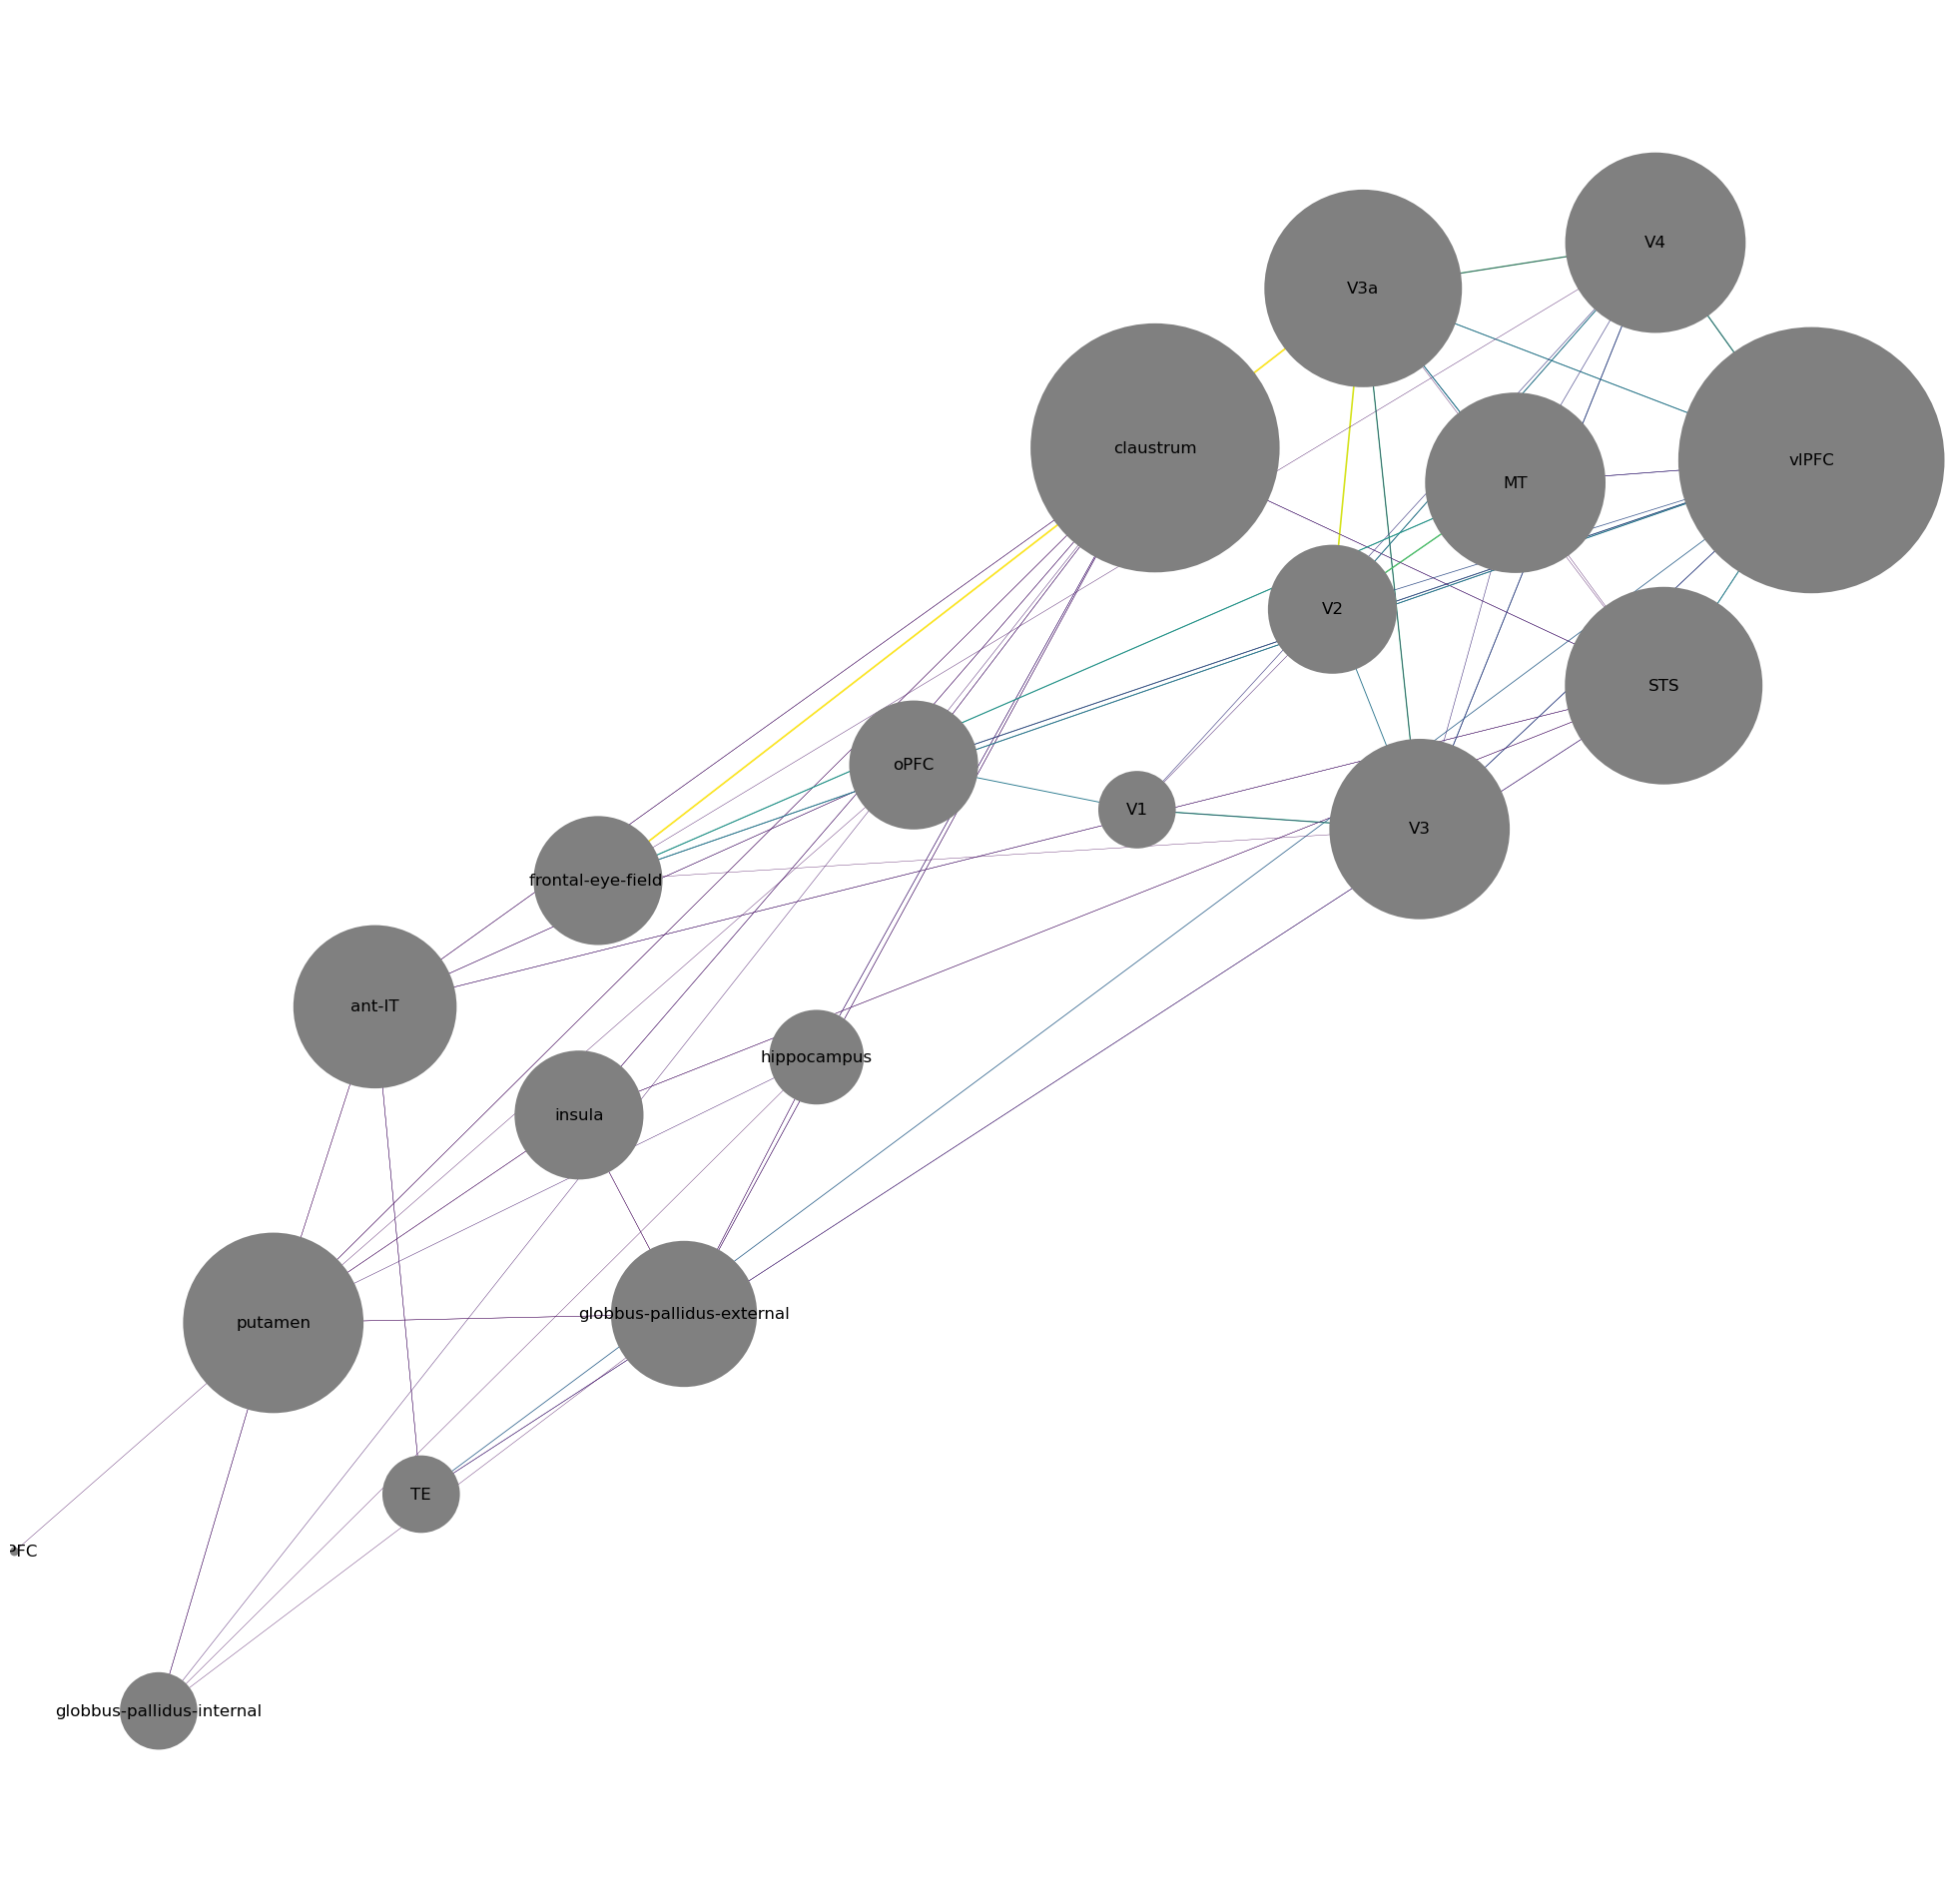

In [14]:
drawing = gr.layouts.render._draw_graph(undirected_connectome, layout, node_colors, 1.,
                                        edge_line_width=edge_widths,
                                        edge_alpha=1.,
                                        edge_colors=edge_colors,
                                        labels=labels,
                                        figure_width=25,
                                        figure_height=25)

In [15]:
data = nx.readwrite.write_gml(ai_graph, '/Users/loggiasr/Projects/fmri/monkey_fmri/MTurk1/misc_testing_files/super_4_lowl1_noise_cynetwork_out.gml')
